<a href="https://colab.research.google.com/github/proteus21/DATA-SCIENCE-STUDY/blob/main/DATA-SCIENCE-STUDY/COMPUTER-VISION-PROJECT/Recognise_car_number_plates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


To install scikit-learn library use command below 

**!pip install scikit-learn**

###Source Datasets

https://www.kaggle.com/datasets/andrewmvd/car-plate-detection

This dataset contains 433 images with bounding box annotations of the car license plates within the image.
Annotations are provided in the PASCAL VOC format.

In order to update to newest scikit-learn library, use command below

**!pip install --upgrade scikit-learn**

### Contest:
1. [Import of libraries](#0)
2. [Data generation](#1)
3. [Text vectorisation](#2)
4. [Text vectorisation - bigramy](#3)
5. [TFIDF Transformer](#4)
6. [TFIDF Vectorizer](#5)
7. [Preparation of text data - example](#6)



### Install google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# mounting google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Downloading datasets from Kaggle to google drive

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"


In [ ]:
%cd /content/drive/My Drive/Kaggle

/content/drive/My Drive/Kaggle


In [ ]:

import os

os.environ['KAGGLE_USERNAME'] = "boguslawkonefal" # username from the json file
os.environ['KAGGLE_KEY'] = "7cb6db4e089f5f4e0ea7a0ebf9018d5a" # key from the json file

!kaggle datasets download -d andrewmvd/car-plate-detection

 94% 191M/203M [00:02<00:00, 108MB/s] 
100% 203M/203M [00:02<00:00, 88.7MB/s]


In [ ]:
 !unzip -uq "/content/drive/My Drive/Kaggle/car-plate-detection.zip" -d "/content/drive/My Drive/Kaggle/" # unzip file in google drive

### <a name='0'></a> Import  of libraries

In [ ]:
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.4 MB/s eta 0:00:00


In [ ]:
!pip uninstall opencv-python

Found existing installation: opencv-python 4.7.0.72
Uninstalling opencv-python-4.7.0.72:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/cv2/*
    /usr/local/lib/python3.9/dist-packages/opencv_python-4.7.0.72.dist-info/*
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libQt5Core-39545cc7.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libQt5Gui-48e93776.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libQt5Test-c38a5234.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libQt5Widgets-e69d94fb.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libQt5XcbQpa-c112ba75.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libX11-xcb-69166bdf.so.1.0.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libavcodec-16a334ab.so.59.37.100
    /usr/local/lib/python3.9/di

In [ ]:
!pip install opencv-python==4.6.0.66

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 17.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.7.0.72
    Uninstalling opencv-python-4.7.0.72:
      Successfully uninstalled opencv-python-4.7.0.72


# Load libraries

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
import cv2
import imutils
from glob import glob # listnening names as pattern
from sklearn.model_selection import train_test_split 
import imgaug.augmenters as iaa
import keras_tuner
from google.colab.patches import cv2_imshow                                                      
import xml.etree.ElementTree as xet
import plotly.express as px

print(f"Tensorflow {tf.__version__}")
print(f"Pandas {pd.__version__}")
print(f"Numpy {np.__version__}")
print(f"Keras_tuner{keras_tuner.__version__}")
print(f"OpenCV-{cv2.__version__}")


print(os.path.abspath('..'))


Tensorflow 2.11.0
Pandas 1.4.4
Numpy 1.22.4
Keras_tuner1.3.0
OpenCV-4.7.0
/


# Understand data sets and problems

In [ ]:
IMAGE_SIZE=224

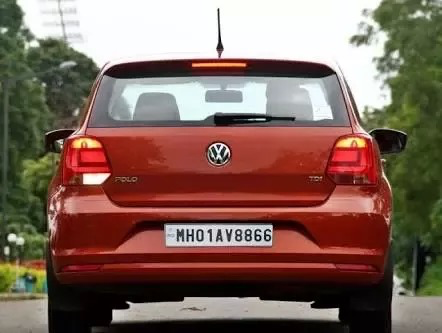

In [ ]:
path = "/content/drive/My Drive/Kaggle/train/Cars108.png"
image = cv2.imread(path,1)
cv2_imshow(image)

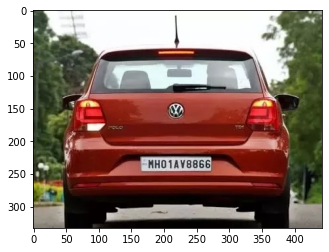

In [ ]:
filename = "/content/drive/My Drive/Kaggle/train/Cars108.png"
car_img = cv2.imread(filename,1)
car_img=cv2.cvtColor(car_img, cv2.COLOR_BGR2RGB)
plt.imshow(car_img)

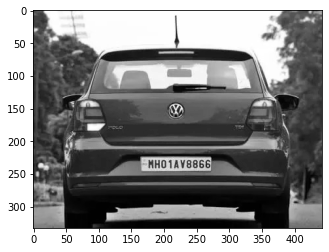

In [ ]:
gray = cv2.cvtColor(car_img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)

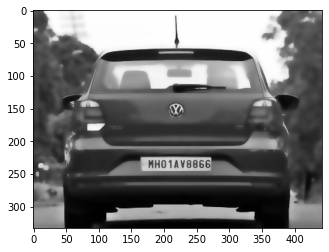

In [ ]:
blurred_gray = cv2.bilateralFilter(gray, 10, 50, 50)
plt.imshow(blurred_gray, cmap='gray', vmin=0, vmax=255)

(333, 442)


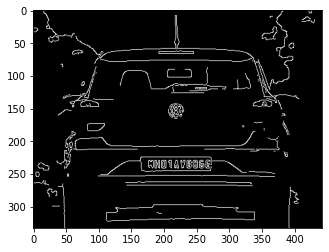

In [ ]:
edged = cv2.Canny(blurred_gray, 140, 200) 
print(edged.shape)
plt.imshow(edged, cmap='gray', vmin=0, vmax=255)

#Preparation of data sets

###  Project contains two types of the files such as  XML and png.
XML file has got etree with object --> bndbox and parameters xmin, xmax, ymin, ymax

In [ ]:
x="Cars0.xml"
x[4:-4]

'0'

In [ ]:
# Read parametrs from xml file as y by built dataframe

labels_dict = dict(filepath=[],width=[], height=[],xmin_org=[],xmax_org=[],ymin_org=[],ymax_org=[],xmin=[],xmax=[],ymin=[],ymax=[])
dir_name = '/content/drive/My Drive/Kaggle/train/'
# Or we generete array y

y=[]

# Get list of all files in a given directory sorted by name

#list_of_files = sorted( filter( os.path.isfile, glob(dir_name + '*.xml') ) ) - sorting doesn"t work

# If we have sorted file acc. to  number
def sortKeyFunc(s):
    return int(os.path.basename(s)[4:-4])

list_of_files=  sorted(glob(dir_name + '*.xml'),key=sortKeyFunc)

for filename in list_of_files:
    #print(filename)
    tree = xet.parse(filename)
    root = tree.getroot()

    member_object = root.find('object')
    member_size = root.find('size')
    #labels_size = member_size.find('size')
    width = int( member_size.find('width').text)
    height = int( member_size.find('height').text)

    labels_info = member_object.find('bndbox')
    xmin_org = int(labels_info.find('xmin').text) 
    xmax_org = int(labels_info.find('xmax').text) 
    ymin_org = int(labels_info.find('ymin').text)
    ymax_org = int(labels_info.find('ymax').text)

    xmin = int(int(labels_info.find('xmin').text) /(width/IMAGE_SIZE))
    xmax = int(int(labels_info.find('xmax').text) /(width/IMAGE_SIZE))
    ymin = int(int(labels_info.find('ymin').text) /(height/IMAGE_SIZE))
    ymax = int(int(labels_info.find('ymax').text)/ (height/IMAGE_SIZE))


    labels_dict['filepath'].append(filename)
    labels_dict['width'].append(width)
    labels_dict['height'].append(height)
    labels_dict['xmin_org'].append(xmin_org)
    labels_dict['xmax_org'].append(xmax_org)
    labels_dict['ymin_org'].append(ymin_org)
    labels_dict['ymax_org'].append(ymax_org)
    labels_dict['xmin'].append(xmin)
    labels_dict['xmax'].append(xmax)
    labels_dict['ymin'].append(ymin)
    labels_dict['ymax'].append(ymax)

    # create directly as array
    y.append([xmin,ymin,xmax,ymax])



In [ ]:
print(y[0][0],y[0][1],y[0][2],y[0][3]) # scaled image by IMAGE_SIZE


101 104 187 144


#Create dataset

In [ ]:
# We bulit data frame for parametrs
df=pd.DataFrame(labels_dict)
df.to_csv('labels.csv', index=False)
df.head()

,filepath,width,height,xmin_org,xmax_org,ymin_org,ymax_org,xmin,xmax,ymin,ymax
0,/content/drive/My Drive/Kaggle/train/Cars0.xml,500,268,226,419,125,173,101,187,104,144
1,/content/drive/My Drive/Kaggle/train/Cars1.xml,400,248,134,262,128,160,75,146,115,144
2,/content/drive/My Drive/Kaggle/train/Cars2.xml,400,400,229,270,176,193,128,151,98,108
3,/content/drive/My Drive/Kaggle/train/Cars3.xml,400,225,142,261,128,157,79,146,127,156
4,/content/drive/My Drive/Kaggle/train/Cars4.xml,590,350,156,503,82,253,59,190,52,161


In [ ]:
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filepath  411 non-null    object
 1   width     411 non-null    int64 
 2   height    411 non-null    int64 
 3   xmin_org  411 non-null    int64 
 4   xmax_org  411 non-null    int64 
 5   ymin_org  411 non-null    int64 
 6   ymax_org  411 non-null    int64 
 7   xmin      411 non-null    int64 
 8   xmax      411 non-null    int64 
 9   ymin      411 non-null    int64 
 10  ymax      411 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 35.4+ KB
None


###Verify the XML data

In [ ]:
df


,filepath,width,height,xmin_org,xmax_org,ymin_org,ymax_org,xmin,xmax,ymin,ymax
0,/content/drive/My Drive/Kaggle/train/Cars0.xml,500,268,226,419,125,173,101,187,104,144
1,/content/drive/My Drive/Kaggle/train/Cars1.xml,400,248,134,262,128,160,75,146,115,144
2,/content/drive/My Drive/Kaggle/train/Cars2.xml,400,400,229,270,176,193,128,151,98,108
3,/content/drive/My Drive/Kaggle/train/Cars3.xml,400,225,142,261,128,157,79,146,127,156
4,/content/drive/My Drive/Kaggle/train/Cars4.xml,590,350,156,503,82,253,59,190,52,161
...,...,...,...,...,...,...,...,...,...,...,...
406,/content/drive/My Drive/Kaggle/train/Cars406.xml,600,411,285,374,185,226,106,139,100,123
407,/content/drive/My Drive/Kaggle/train/Cars407.xml,400,267,311,346,183,202,174,193,153,169
408,/content/drive/My Drive/Kaggle/train/Cars408.xml,400,267,160,187,217,228,89,104,182,191
409,/content/drive/My Drive/Kaggle/train/Cars409.xml,320,276,116,203,146,168,81,142,118,136


# Check the sample data

In [ ]:
df[::284]  

,filepath,width,height,xmin_org,xmax_org,ymin_org,ymax_org,xmin,xmax,ymin,ymax
0,/content/drive/My Drive/Kaggle/train/Cars0.xml,500,268,226,419,125,173,101,187,104,144
284,/content/drive/My Drive/Kaggle/train/Cars284.xml,375,500,70,260,199,271,41,155,89,121


In [ ]:
# In order to build 
filename = "/content/drive/My Drive/Kaggle/train/Cars284.png"
car_img = cv2.imread(filename,1)
fig = px.imshow(car_img)
fig.update_layout(width=400, height=400, margin=dict(l=10, r=10, b=10, t=10),xaxis_title='Figure -Cars 368.png with bounding box')
fig.add_shape(type='rect',x0=labels_dict['xmin_org'][284], x1=labels_dict['xmax_org'][284], y0=labels_dict['ymin_org'][284], y1=labels_dict['ymax_org'][284], xref='x', yref='y',line_color='cyan')


In [ ]:
#IMAGE_SIZE=224
image_dir="/content/drive/My Drive/Kaggle/train"
path=os.path.join(image_dir, '*g')
#files=glob(path)
files=sorted(glob(path),key=sortKeyFunc)

X=[]
X1=[]
for f in files:
  img=cv2.imread(f)
  img=cv2.resize(img,(IMAGE_SIZE, IMAGE_SIZE))
  X.append(np.array(img))
  X1.append([f,np.array(img)]) # for test



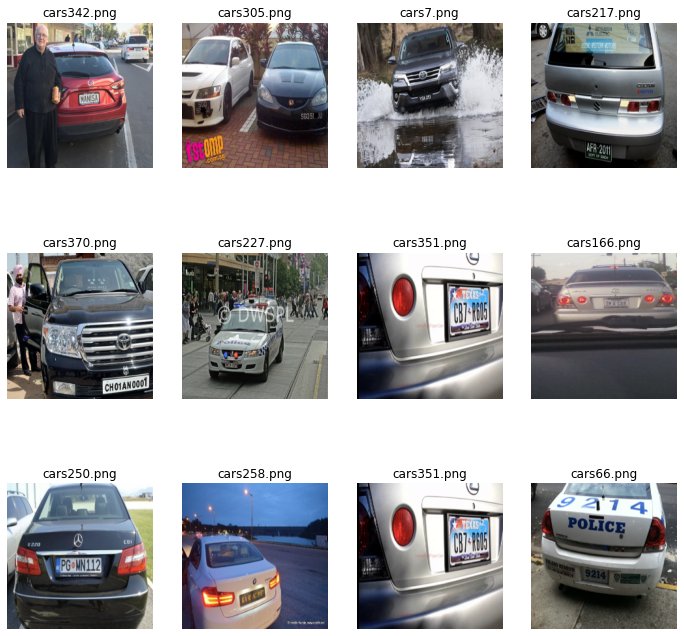

In [ ]:
dataset_index=[]
for i in range (12):
  dataset_index.append(np.random.randint(0, len(X)))

plt.figure(figsize=(12, 12))
for index, i  in enumerate(dataset_index):
  plt.subplot(3,4,index+1)
  plt.axis('off')
  plt.title(f'cars{i}.png')
  plt.imshow(cv2.cvtColor(X[i],cv2.COLOR_BGR2RGB))



In [ ]:
print(f' X.Shape{np.array(X).shape}')
print(f' y.Shape{np.array(y).shape}')

 X.Shape(411, 224, 224, 3)
 y.Shape(411, 4)


cars342.png 109 110 141 126
cars305.png 179 138 216 151
cars7.png 92 113 115 123
cars217.png 83 182 124 215
cars370.png 143 185 212 220
cars227.png 66 166 85 177
cars351.png 139 47 206 128
cars166.png 110 68 150 84
cars250.png 66 101 153 148
cars258.png 88 154 128 195
cars351.png 139 47 206 128
cars66.png 80 127 118 151


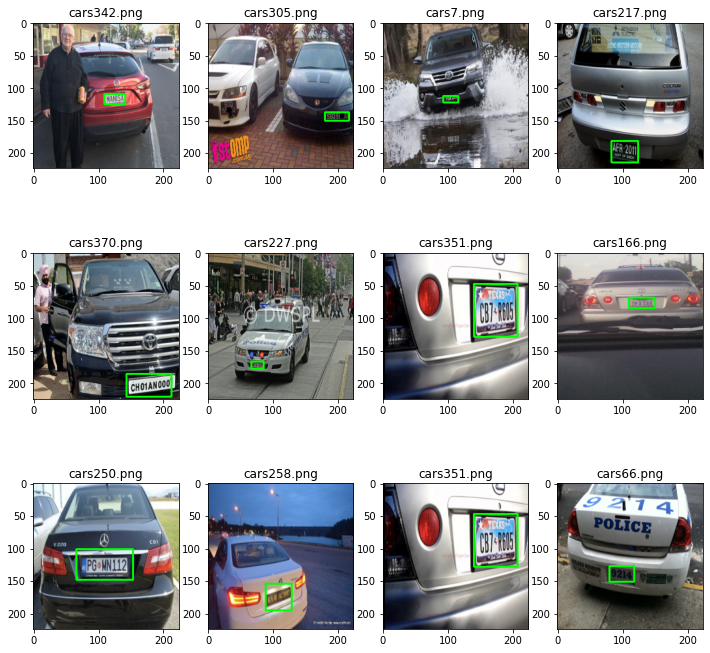

In [ ]:
#dataset_index=[]
#for i in range (12):
  #dataset_index.append(np.random.randint(0, len(X)))

plt.figure(figsize=(12, 12))
for index, i  in enumerate(dataset_index):
  plt.subplot(3,4,index+1)
  #plt.axis('off')
  image = cv2.rectangle(cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB),(int(y[i][0]),int(y[i][1])),(int(y[i][2]),int(y[i][3])),(0, 255, 0), 2)
  plt.title(f'cars{i}.png')
  plt.imshow(image)
  print(f'cars{i}.png',int(y[i][0]),int(y[i][1]),int(y[i][2]),int(y[i][3]))


In [ ]:
print(labels_dict['xmin'][95],labels_dict['xmax'][95],labels_dict['ymin'][95], labels_dict['ymax'][95])

103 151 101 147


### Preprocesing - Normalization

In [ ]:
X=np.array(X) /255
y=np.array(y) /255

In [ ]:
from tensorflow.python import train
X_train,X_test,y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((262, 224, 224, 3), (83, 224, 224, 3), (262, 4), (83, 4))

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from keras.layers import Input, Flatten, Dense
from tensorflow.keras.optimizers import SGD

### Model VGG16

In [ ]:

model = Sequential()
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3)))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

model.layers[-6].trainable = False

model.summary()

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=1)

58889256/58889256 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                         

KeyboardInterrupt: ignored

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss curves (VGG16)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy curves (VGG16)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# MODEL 2 -VGG19

In [ ]:
model = Sequential()
model.add(VGG19(weights="imagenet", include_top=False, input_shape=(224, 224, 3)))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

model.layers[-6].trainable = False

model.summary()

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=1)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss curves (VGG19)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy curves (VGG19)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#InceptionResNetV2

In [ ]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.optimizers import RMSprop


In [ ]:
inception_resnet = InceptionResNetV2(weights="imagenet",include_top=False, input_tensor=Input(shape=(224,224,3)))
# ---------------------
model_1 = inception_resnet.output
model_1 = Flatten()(model_1)
model_1 = Dense(1024,activation="relu")(model_1)
model_1 = Dropout(0.2)(model_1)
model_1 = Dense(4,activation='sigmoid')(model_1)


# ---------- model
model = Model(inputs=inception_resnet.input,outputs=model_1)

In [ ]:
model.compile(optimizer = RMSprop(lr=0.0001),loss = 'binary_crossentropy',metrics = ['acc'])

model.summary()

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=1)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss curves (VGG19)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Training and validation accuracy curves (VGG19)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# EASY OCR  PLATE RECOGNITION

In [ ]:
! pip install easyocr
! install imutils

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import imutils
import easyocr

In [ ]:
image_file = "//content//drive//My Drive//Kaggle//train//Cars111.png"
img = cv2.imread(image_file,1)

In [ ]:
# read image and covert to gray scale
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)

In [ ]:
bfilter=cv2.bilateralFilter(gray, 11,17,17) # noise reduction
edged=cv2.Canny(bfilter, 30,200) # Edge detection
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

In [ ]:
# find contours from the edged image and keep only the largest
# ones, and initialize our screen contour
keypoints=cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
#sorts contours based on minimum area 30 and ignores the ones below that
contours=sorted(contours, key=cv2.contourArea, reverse=True)[:30]

In [ ]:
location=None
for contour in contours:
  peri = cv2.arcLength(contour, True)
  approx=cv2.approxPolyDP(contour,0.018 * peri, True)
  if len(approx)==4:
   location=approx
   break



In [ ]:
location

In [ ]:
mask=np.zeros(gray.shape[0:2], np.uint8)
new_image=cv2.drawContours(mask,[location],0,255,-1)
new_image=cv2.bitwise_and(img,img, mask=mask)
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [ ]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped_image=gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

In [ ]:
reader=easyocr.Reader(['en'])
result=reader.readtext(cropped_image)




In [ ]:
text=result[0][-2]
print(f" Recognized car label:{text}")

In [ ]:
res=cv2.putText(img, text=text,org=(approx[0][0][0], approx[1][0][1]+60),fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0,255,0), thickness=2)
res=cv2.rectangle(img,tuple(approx[0][0]), tuple(approx[2][0]),(0,255,0), 3)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))

#Wideocam Recognation

In [ ]:
import cv2

from google.colab import output
# Request access to the user's camera
output.eval_js('''
  const video = document.createElement('video');
  video.style.display = 'none';
  document.body.appendChild(video);
  const constraints = { audio: false, video: true };
  navigator.mediaDevices.getUserMedia(constraints)
    .then(stream => {
      video.srcObject = stream;
      video.play();
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
    })
    .catch(err => {
      console.log('Error accessing camera:', err);
    });
''')

cap=cv2.VideoCapture(0)
carcascade="//content//drive//MyDrive//Kaggle//car.xml"
#Camera overalls dimensions

cap.set(3,640) # width
cap.set(4,480) # height
cap.set(10,100)#brightness
min_area = 500

while True:
  success,img= cap.read()
  print(cap.read())
  plate_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + carcascade)
  gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
  plates= plate_cascade.detecMultiScale(gray, 1.1, 4)

  for(x,y,w,h) in plates:
      area=w*h
      if area > min_area:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0),2)
        cv2.putText(img, 'Number Platet',(x,y-5),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(255,0,255),2 )

  cv2.imshow('Results', img)         
             
  if cv2.waitKey(1) &0xFF ==ord('q'):
    break


In [ ]:
# Adapted from: https://stackoverflow.com/a/62804023/4879610
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def record_video(filename):
  js = Javascript("""
    async function recordVideo() {
      // mashes together the advanced_outputs.ipynb function provided by Colab, 
      // a bunch of stuff from Stack overflow, and some sample code from:
      // https://developer.mozilla.org/en-US/docs/Web/API/MediaStream_Recording_API

      // Optional frames per second argument.
      const options = { mimeType: "video/webm; codecs=vp9" };
      const div = document.createElement('div');
      const capture = document.createElement('button');
      const stopCapture = document.createElement("button");
      capture.textContent = "Start Recording";
      capture.style.background = "green";
      capture.style.color = "white";

      stopCapture.textContent = "Stop Recording";
      stopCapture.style.background = "red";
      stopCapture.style.color = "white";
      div.appendChild(capture);

      const video = document.createElement('video');
      const recordingVid = document.createElement("video");
      video.style.display = 'block';

      const stream = await navigator.mediaDevices.getUserMedia({audio:true, video: true});
      // create a media recorder instance, which is an object
      // that will let you record what you stream.
      let recorder = new MediaRecorder(stream, options);
      document.body.appendChild(div);
      div.appendChild(video);
      // Video is a media element.  This line here sets the object which serves
      // as the source of the media associated with the HTMLMediaElement
      // Here, we'll set it equal to the stream.
      video.srcObject = stream;

      // from https://stackoverflow.com/questions/62529304/is-there-any-way-to-capture-live-video-using-webcam-in-google-colab#comment114644726_62804023
      video.muted = true;

      // We're inside an async function, so this await will fire off the playing
      // of a video. It returns a Promise which is resolved when playback has 
      // been successfully started. Since this is async, the function will be 
      // paused until this has started playing. 
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      // and now, just wait for the capture button to get clicked in order to
      // start recording
      await new Promise((resolve) => {
        capture.onclick = resolve;
      });
      recorder.start();
      capture.replaceWith(stopCapture);
      // use a promise to tell it to stop recording
      await new Promise((resolve) => stopCapture.onclick = resolve);
      recorder.stop();

      let recData = await new Promise((resolve) => recorder.ondataavailable = resolve);
      let arrBuff = await recData.data.arrayBuffer();
      
      // stop the stream and remove the video element
      stream.getVideoTracks()[0].stop();
      div.remove();

      let binaryString = "";
      let bytes = new Uint8Array(arrBuff);
      bytes.forEach((byte) => {
        binaryString += String.fromCharCode(byte);
      })
      return btoa(binaryString);

    }
    """)
  try:
    display(js)
    data = eval_js('recordVideo({})')
    binary = b64decode(data)
    
    with open(filename, "wb") as video_file:
      video_file.write(binary)
    print(
        f"Finished recording video. Saved binary under filename in current working directory: {filename}"
    )
  except Exception as err:
      # In case any exceptions arise
      print(str(err))


In [ ]:
from IPython.display import HTML
from base64 import b64encode

def show_video(video_path, video_width = 600):
  # show saved video in colab.
  video_file = open(video_path, "r+b").read()

  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""""")

In [ ]:
video_path = "test.mp4"
record_video(video_path)

NameError: ignored

In [ ]:
show_video(video_path)